# Problem Statement :-
    
Build the linear regression model using scikit learn in Car data to predict 'Price' based on other dependent variable.

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading DataSet

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")

### To display the top 5 rows

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### To display the last 5 rows

In [4]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


### Describes the dataset columns:-

Car_ID :- Unique id of each observation (Interger)

Symboling :- Its assigned insurance risk rating, A value of...

carName :- Name of car company (Categorical)

fueltype :- Car fuel type i.e gas or diesel (Categorical)

aspiration :- Aspiration used in a car (Categorical)

doornumber :- Number of doors in a car (Categorical)

carbody :- body of car (Categorical)

drivewheel :- type of drive wheel (Categorical)

enginelocation :- Location of car engine (Categorical)

wheelbase :- Weelbase of car (Numeric)

carlength :- Length of car (Numeric)

carwidth :- Width of car (Numeric)

carheight :- height of car (Numeric)

curbweight :- The weight of a car without occupants

enginetype :- Type of engine. (Categorical)

cylindernumber :- cylinder placed in the car (Categorical)

enginesize :- Size of car (Numeric)

fuelsystem :- Fuel system of car (Categorical)

boreratio :- Boreratio of car (Numeric)

stroke :- Stroke or volume inside the engine (Numeric)

compressionratio :- compression ratio of car (Numeric)

horsepower :- Horsepower (Numeric)

peakrpm :- car peak rpm (Numeric)

citympg :- Mileage in city (Numeric)

highwaympg :- Mileage on highway (Numeric)

price(Dependent variable) :- Price of car (Numeric)

### Understanding Data

In [5]:
data.shape

(205, 26)

There are 205 rows and 26 columns.

In [6]:
# Checking the data type
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are no missing values in this dataset.

### Dropping the duplicate rows if any

In [8]:
# Rows containing duplicate data
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows : ", duplicate_rows_df.shape)

number of duplicate rows :  (0, 26)


There are no Duplicate rows values in this dataset.

### Statistical Analysis

In [9]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Exploratory Data Analysis

##### 1) Modify "CarName" column and replace it.

In [10]:
dc=data["CarName"]
dc=dc.str.split(r'-| ',expand = True)
data["carname"] = dc[0]
data = data.drop(["CarName"], axis=1)
data

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


 #### 2) Analysis Categorical Features 

In [11]:
# list of categorical feature
categorical_feature = [column for column in data.columns if data[column].dtypes == 'O']
categorical_feature

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'carname']

In [12]:
data[categorical_feature]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carname
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [13]:
# count unique values in categorical data
for column in categorical_feature :
    print("column ",column ,"has {} unique categories.".format(len(data[column].unique())))

column  fueltype has 2 unique categories.
column  aspiration has 2 unique categories.
column  doornumber has 2 unique categories.
column  carbody has 5 unique categories.
column  drivewheel has 3 unique categories.
column  enginelocation has 2 unique categories.
column  enginetype has 7 unique categories.
column  cylindernumber has 7 unique categories.
column  fuelsystem has 8 unique categories.
column  carname has 28 unique categories.


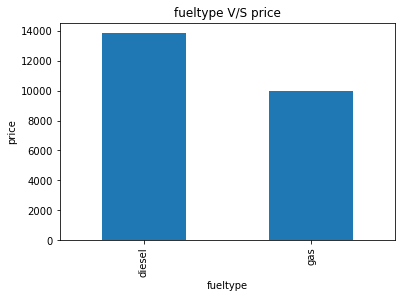

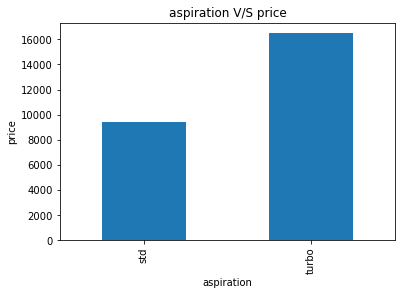

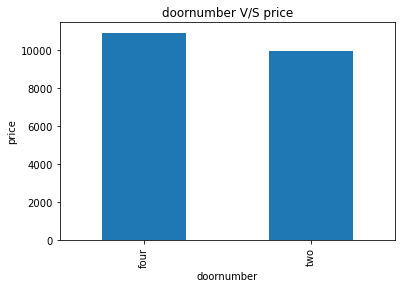

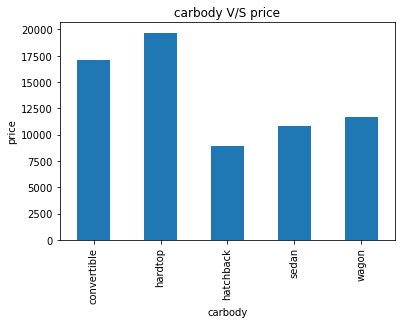

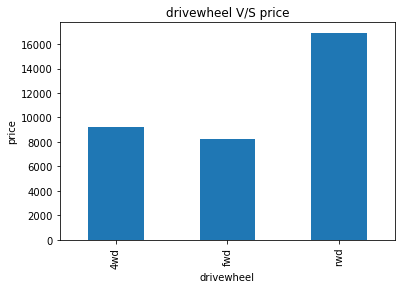

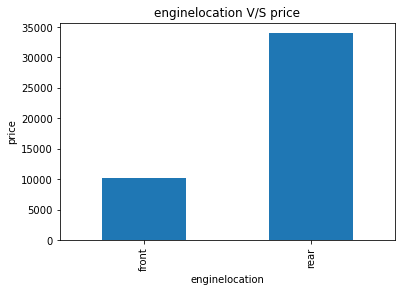

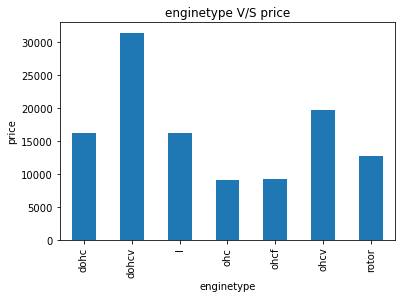

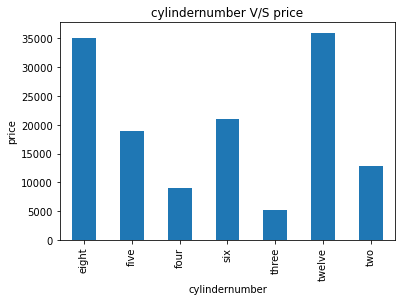

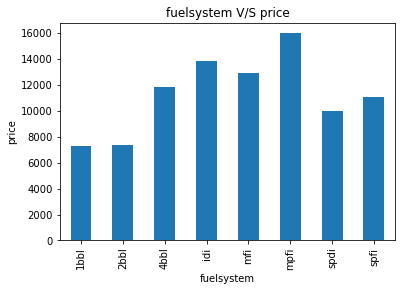

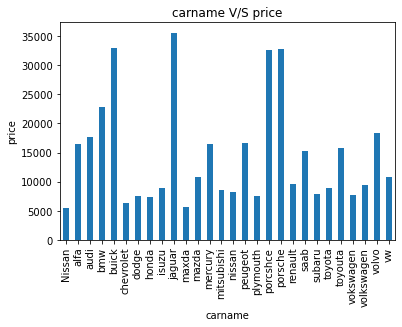

In [14]:
## Find out the relationship between categorical variable and dependent feature "price"
for column in categorical_feature :
    df=data.copy()
    df.groupby(column)['price'].median().plot.bar()
    plt.xlabel(column)
    plt.ylabel('price')
    plt.title(column + " V/S price")
    plt.show()

##### 3) Analysis Numerical Features

In [15]:
# list of numercial Features 
numerical_feature = [column for column in data.columns if column not in categorical_feature+['car_ID','price']]
numerical_feature

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [16]:
data[numerical_feature].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


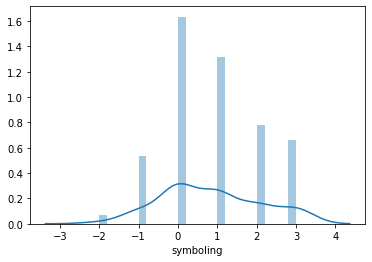

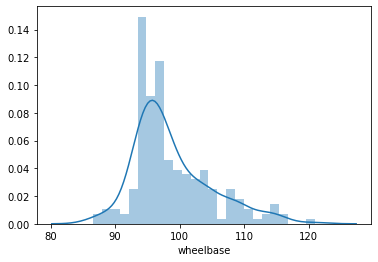

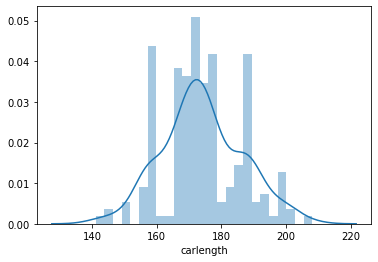

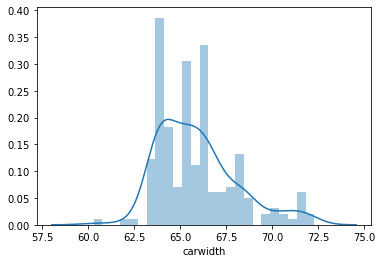

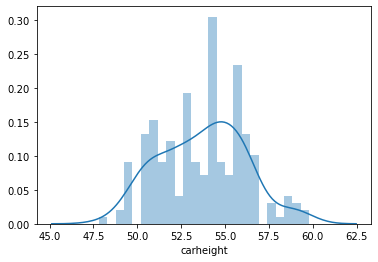

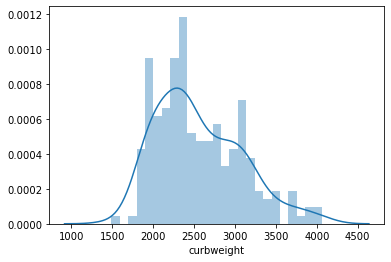

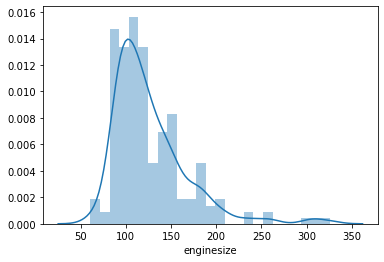

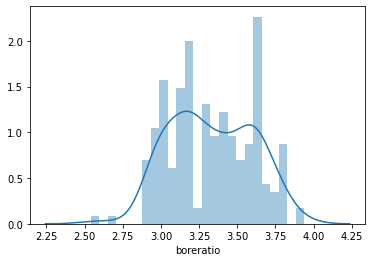

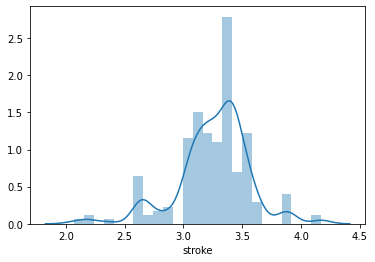

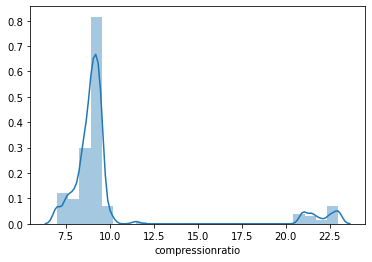

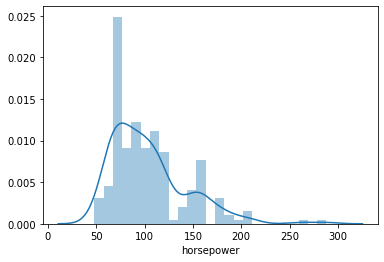

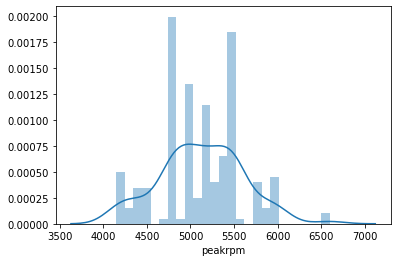

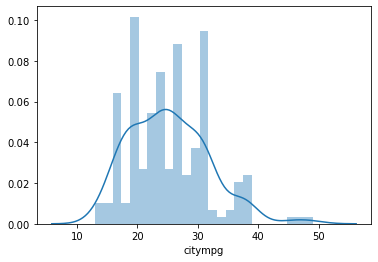

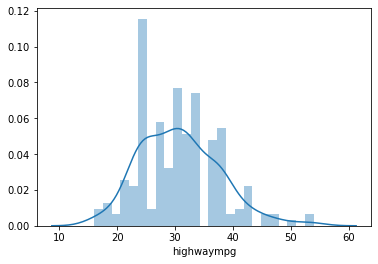

In [17]:
## Find out the relationship between numerical variable and dependent feature "price"
for column in numerical_feature :
    df=data.copy()
    sns.distplot(df[column],bins = 25, hist = True)
    plt.show()

##### Observation:

1) 'wheelbase', 'carlength' , 'curbweight', 'enginesize' , 'citympg', 'highwaympg' columns show normally distributed behavior.

2) 'boreratio', 'stroke', 'compressionratio' and many more columns show skewed behavior.

##### 4)  Detect Outliers

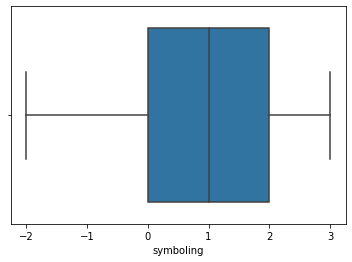

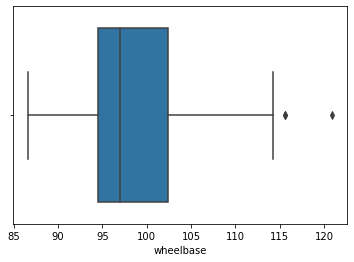

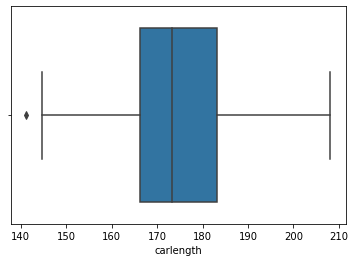

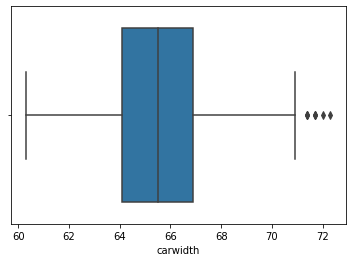

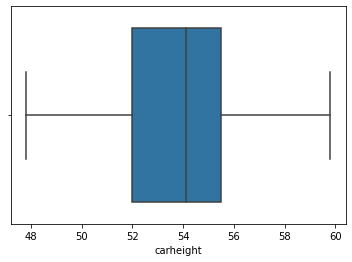

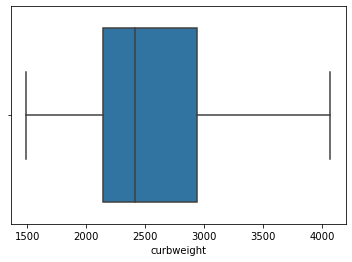

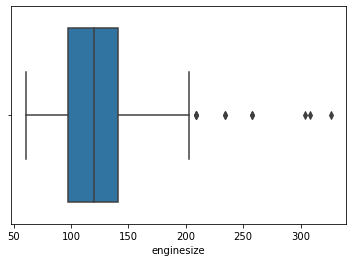

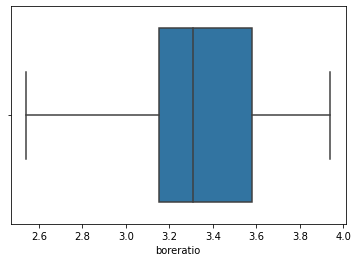

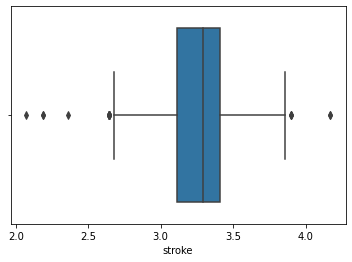

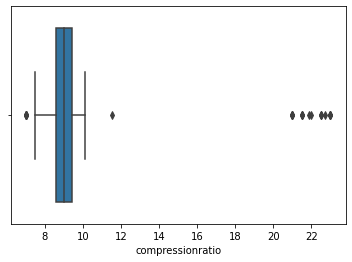

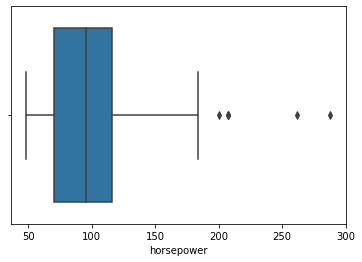

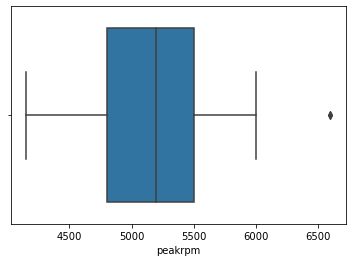

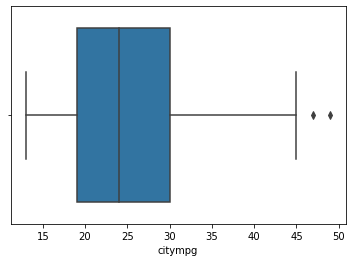

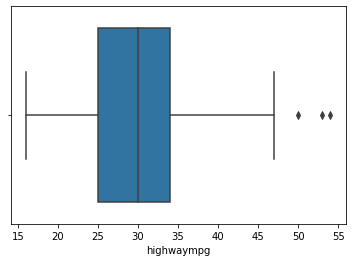

In [18]:
for column in numerical_feature :
    sns.boxplot(data[column])
    plt.show()

'wheelbase', 'carlength', 'carwidth', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg' columns contain outilers 

In [19]:
for k, v in data[numerical_feature].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column symboling outliers = 0.00%
Column wheelbase outliers = 1.46%
Column carlength outliers = 0.49%
Column carwidth outliers = 3.90%
Column carheight outliers = 0.00%
Column curbweight outliers = 0.00%
Column enginesize outliers = 4.88%
Column boreratio outliers = 0.00%
Column stroke outliers = 9.76%
Column compressionratio outliers = 13.66%
Column horsepower outliers = 2.93%
Column peakrpm outliers = 0.98%
Column citympg outliers = 0.98%
Column highwaympg outliers = 1.46%


#### 5) Correlation between variables

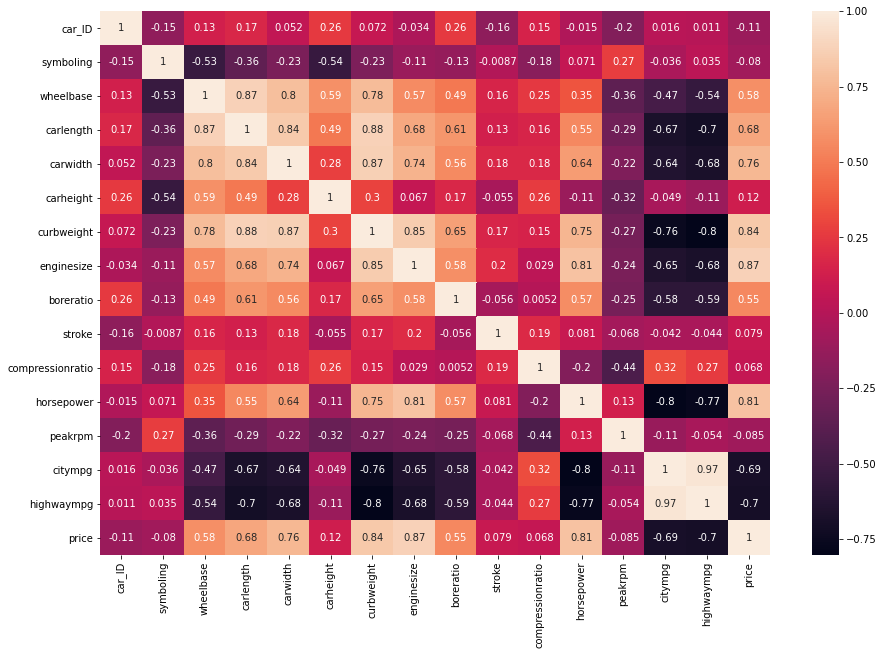

In [20]:
plt.figure(figsize=(15,10), facecolor='white')
data.corr()
sns.heatmap(data=data.corr(), annot=True)

In [21]:
#correlation value of "price" column with other columns
data.corr()['price'][:-1].sort_values(ascending=False)

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

##### Observation :

enginesize , curbweight , horsepower , carwidth  , carlength , wheelbase , boreratio , citympg , highwaympg columns have a correlation greater than |0.5| with price column.

Based on the above observations we will enginesize , curbweight , horsepower , carwidth  , carlength , wheelbase , boreratio , citympg , highwaympg as our Numercial features.

#### Split data into target features  and independent features 

In [22]:
y = data["price"]

In [23]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [24]:
data = data.drop(columns = ["carheight" , "stroke" , "compressionratio" , "symboling" , "peakrpm" , "price"])

In [25]:
data.head()

,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,carname
0,1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,alfa
1,2,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,alfa
2,3,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,alfa
3,4,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,audi
4,5,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,audi


### Feature Engineering 

#### 1) Handling categorical features 

In [26]:
## categorical data
data[categorical_feature]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carname
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [27]:
### one hot encoding
def one_hot_encoding(data, column):
    return pd.get_dummies(data,columns = [column],prefix = column)

In [28]:
data = one_hot_encoding(data,"fueltype")

In [29]:
data

,car_ID,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,...,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,carname,fueltype_diesel,fueltype_gas
0,1,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,...,four,130,mpfi,3.47,111,21,27,alfa,0,1
1,2,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,...,four,130,mpfi,3.47,111,21,27,alfa,0,1
2,3,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,...,six,152,mpfi,2.68,154,19,26,alfa,0,1
3,4,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,...,four,109,mpfi,3.19,102,24,30,audi,0,1
4,5,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,...,five,136,mpfi,3.19,115,18,22,audi,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,std,four,sedan,rwd,front,109.1,188.8,68.9,2952,...,four,141,mpfi,3.78,114,23,28,volvo,0,1
201,202,turbo,four,sedan,rwd,front,109.1,188.8,68.8,3049,...,four,141,mpfi,3.78,160,19,25,volvo,0,1
202,203,std,four,sedan,rwd,front,109.1,188.8,68.9,3012,...,six,173,mpfi,3.58,134,18,23,volvo,0,1
203,204,turbo,four,sedan,rwd,front,109.1,188.8,68.9,3217,...,six,145,idi,3.01,106,26,27,volvo,1,0


In [30]:
data = one_hot_encoding(data,"aspiration")

In [31]:
data = one_hot_encoding(data,"doornumber")

In [32]:
data = one_hot_encoding(data,"drivewheel")

In [33]:
data = one_hot_encoding(data,"enginelocation")
data.head()

,car_ID,carbody,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
0,1,convertible,88.6,168.8,64.1,2548,dohc,four,130,mpfi,...,1,1,0,0,1,0,0,1,1,0
1,2,convertible,88.6,168.8,64.1,2548,dohc,four,130,mpfi,...,1,1,0,0,1,0,0,1,1,0
2,3,hatchback,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,...,1,1,0,0,1,0,0,1,1,0
3,4,sedan,99.8,176.6,66.2,2337,ohc,four,109,mpfi,...,1,1,0,1,0,0,1,0,1,0
4,5,sedan,99.4,176.6,66.4,2824,ohc,five,136,mpfi,...,1,1,0,1,0,1,0,0,1,0


In [34]:
data["carname"].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [35]:
### perform count and frequency encoding for "carname" column.
count = data["carname"].value_counts()
data["carname"] = data["carname"].map(count)
data["carname"]

0       3
1       3
2       3
3       7
4       7
       ..
200    11
201    11
202    11
203    11
204    11
Name: carname, Length: 205, dtype: int64

In [36]:
count

toyota        31
nissan        17
mazda         15
honda         13
mitsubishi    13
subaru        12
volvo         11
peugeot       11
dodge          9
volkswagen     9
bmw            8
buick          8
plymouth       7
audi           7
saab           6
isuzu          4
porsche        4
alfa           3
chevrolet      3
jaguar         3
vw             2
maxda          2
renault        2
mercury        1
toyouta        1
porcshce       1
Nissan         1
vokswagen      1
Name: carname, dtype: int64

In [37]:
data = data.drop(columns = ["car_ID","carbody","enginetype","cylindernumber","fuelsystem","fueltype_gas","aspiration_std","doornumber_four","drivewheel_4wd","enginelocation_front"])
data.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carname,fueltype_diesel,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,3,0,0,1,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,3,0,0,1,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,3,0,0,1,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,7,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,7,0,0,0,0,0,0


### Standardization 

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [40]:
data_scaled

array([[-1.6907718 , -0.42652147, -0.84478235, ..., -1.18817705,
         1.30283093, -0.12186667],
       [-1.6907718 , -0.42652147, -0.84478235, ..., -1.18817705,
         1.30283093, -0.12186667],
       [-0.70859588, -0.23151305, -0.19056612, ..., -1.18817705,
         1.30283093, -0.12186667],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ..., -1.18817705,
         1.30283093, -0.12186667],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -1.18817705,
         1.30283093, -0.12186667],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -1.18817705,
         1.30283093, -0.12186667]])

### Check Multi-Colineraity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(data_scaled,i) for i in range(data_scaled.shape[1])]
vif["Features"] = data.columns

#let's check the values
vif

,vif,Features
0,7.547992,wheelbase
1,10.203107,carlength
2,6.023642,carwidth
3,21.100765,curbweight
4,8.074051,enginesize
5,2.151423,boreratio
6,9.052980,horsepower
7,28.788274,citympg
8,27.369321,highwaympg
9,1.129070,carname


##### Observation :

1) As VIF Factor of "carlength" , "curbweight" , "citympg" , "highwaympg" are greater than 10 so,we Remove these columns.

In [43]:
data = data.drop(columns = ["carlength" , "curbweight" , "citympg" , "highwaympg"])
data.head()

,wheelbase,carwidth,enginesize,boreratio,horsepower,carname,fueltype_diesel,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,88.6,64.1,130,3.47,111,3,0,0,1,0,1,0
1,88.6,64.1,130,3.47,111,3,0,0,1,0,1,0
2,94.5,65.5,152,2.68,154,3,0,0,1,0,1,0
3,99.8,66.2,109,3.19,102,7,0,0,0,1,0,0
4,99.4,66.4,136,3.19,115,7,0,0,0,0,0,0


In [44]:
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-1.6907718 , -0.84478235,  0.07444893, ..., -1.18817705,
         1.30283093, -0.12186667],
       [-1.6907718 , -0.84478235,  0.07444893, ..., -1.18817705,
         1.30283093, -0.12186667],
       [-0.70859588, -0.19056612,  0.60404617, ..., -1.18817705,
         1.30283093, -0.12186667],
       ...,
       [ 1.72187336,  1.39824472,  1.10957081, ..., -1.18817705,
         1.30283093, -0.12186667],
       [ 1.72187336,  1.39824472,  0.43553795, ..., -1.18817705,
         1.30283093, -0.12186667],
       [ 1.72187336,  1.39824472,  0.33924755, ..., -1.18817705,
         1.30283093, -0.12186667]])

### Splitting data into train and test

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled,y,test_size=0.33,random_state=5)

In [47]:
x_train.shape , y_train.shape

((137, 12), (137,))

In [48]:
x_test.shape , y_test.shape

((68, 12), (68,))

### Implementation of Machine learning algorithms 

##### 1) Linear Regression 

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
prediction = lr.predict(x_test)

In [52]:
prediction 

array([ 6517.46429995,  7012.63428383, 18026.08280258, 32018.61077549,
        7274.8211968 , 17116.50076415, 19239.49455264,  7208.54033169,
        6286.1875674 ,  8027.8497839 ,  6095.07493313,  7208.54033169,
        8570.72205153, 15150.53424532,  9778.32869412,  9890.62901705,
       14042.07506243, 31419.35382503,  7145.82534494,  6305.94101043,
        4165.31845953, 10398.85129548, 10711.82778326, 18914.22006581,
       10708.02318531, 10852.4772818 , 12076.17699   ,  4165.31845953,
       19041.11409389,  6478.13242601, 10352.52184568,  6110.03496256,
       18523.00809492, 14670.98181425,  9730.8690674 , 10809.36934788,
        9974.46226306, 28926.63642697, 35908.11155077,  8069.95049698,
        7487.47945843, 13810.03586108, 10156.61579782,  6174.04855771,
       17116.50076415, 17369.90902925, 17289.92170198,  7208.54033169,
       36145.2644869 , 17216.75645463,  8069.95049698,  6618.70649151,
        9974.46226306,  8135.55036288,  7665.71040384, 13667.15591354,
      

In [53]:
### R2 Score of model
lr.score(x_train,y_train)

0.8690442205191529

In [54]:
lr.score(x_test,y_test)

0.8920059126058735

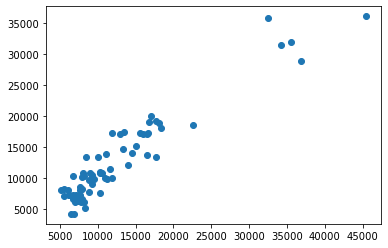

In [55]:
plt.scatter(y_test,prediction)

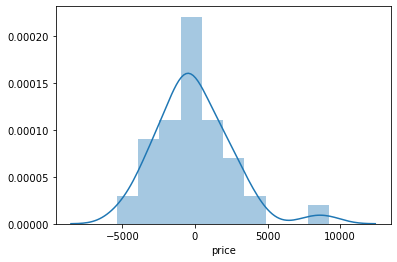

In [56]:
sns.distplot(y_test-prediction)

##### 2) ElasticNet Regression  

In [57]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [58]:
elasticCV = ElasticNetCV(alphas = None , cv = 20)
elasticCV.fit(x_train,y_train)

ElasticNetCV(cv=20)

In [59]:
alpha = elasticCV.alpha_
alpha

13.635801954520042

In [60]:
L1_ratio = elasticCV.l1_ratio
L1_ratio

0.5

In [61]:
elastic_reg = ElasticNet(alpha = alpha , l1_ratio = L1_ratio)
elastic_reg.fit(x_train,y_train)

ElasticNet(alpha=13.635801954520042)

In [62]:
### R2 Score of model
elastic_reg.score(x_train,y_train)

0.5167592264725906

In [63]:
elastic_reg.score(x_test,y_test)

0.4955661993003727

In [64]:
prediction = elastic_reg.predict(x_test)
prediction 

array([10783.43819938, 10492.14231685, 16749.05479207, 19921.76019124,
       10496.8606375 , 16071.25340486, 14646.11816433, 10496.41323324,
       10881.27438722, 10679.46455686, 11485.5714888 , 10496.41323324,
       12376.5202074 , 12124.59123893, 12210.08526789, 11884.86092708,
       14315.43059533, 19519.47923262, 10541.00785169, 10633.04976905,
        9917.29463491, 12479.96667071, 12058.76374447, 16959.25096902,
       12470.50928798, 12464.90453962, 12545.2007583 ,  9917.29463491,
       16743.93707361, 10519.8652657 , 11915.92932592, 10628.77885266,
       17044.31594028, 13215.23342295, 11658.70430479, 13100.43235123,
       13262.77528323, 19243.14240079, 19578.80073893, 10856.58048791,
       11019.69628052, 14218.10346944, 11911.65840953, 10662.57201304,
       16071.25340486, 14490.3675707 , 15592.71185278, 10496.41323324,
       21300.22179496, 15561.99833204, 10856.58048791, 10459.58739762,
       13262.77528323, 11508.3028773 , 10751.5161254 , 14109.37807913,
      

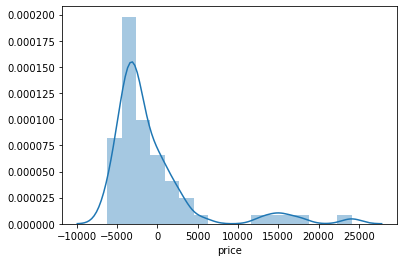

In [65]:
sns.distplot(y_test-prediction)

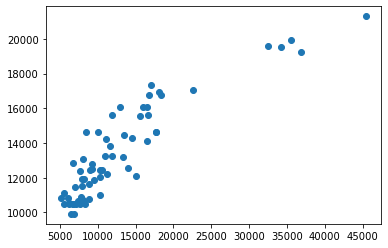

In [66]:
plt.scatter(y_test,prediction)

### 3) Random Forest Regression

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [70]:
r=RandomForestRegressor(n_estimators=100)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [71]:
### R2 Score of model
rf_random.score(x_train,y_train)

0.9659443991787502

In [72]:
rf_random.score(x_test,y_test)

0.9271571864177794

In [73]:
r=RandomForestRegressor(n_estimators=100)

r.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
### R2 Score of model
r.score(x_train,y_train)

0.9846698108139194

In [75]:
r.score(x_test,y_test)

0.9472929398705712

##### Observation :

As R2 Score of Random Forest Regression for train data is 98 % and for tset data is 94 %. So, we use Random Forest Regression for prediction.

### Saving model into pickle format

In [76]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(r,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)